In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [14]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data = train_data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


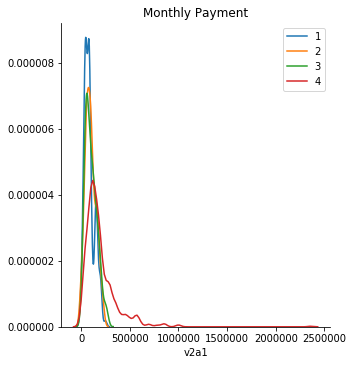

In [15]:
p = sns.FacetGrid(data = train_data, hue = 'Target', size = 5, legend_out=True)
p = p.map(sns.kdeplot, 'v2a1')
plt.legend()
plt.title("Monthly Payment")
plt.show()

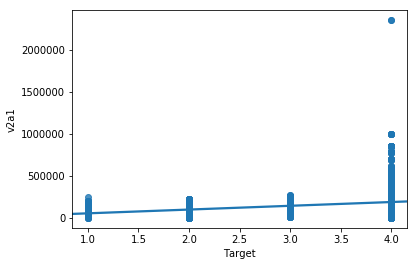

In [16]:
sns.regplot(x = train_data['Target'], y = train_data['v2a1'])
plt.show()


In [17]:
wall_material = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']

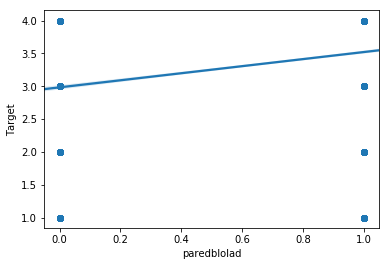

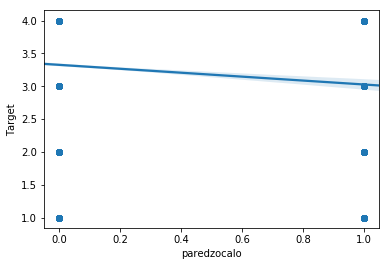

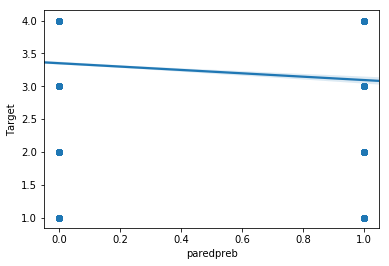

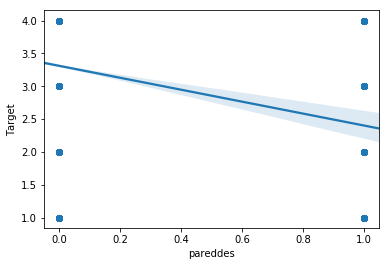

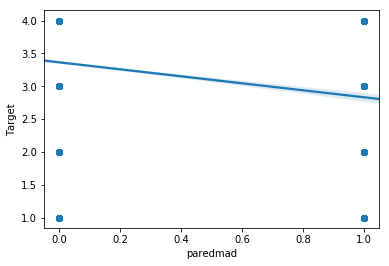

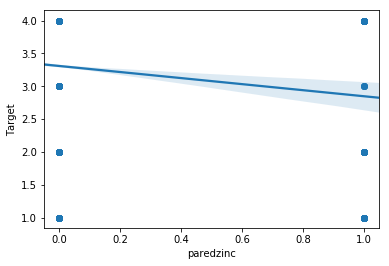

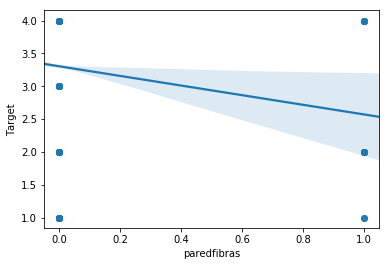

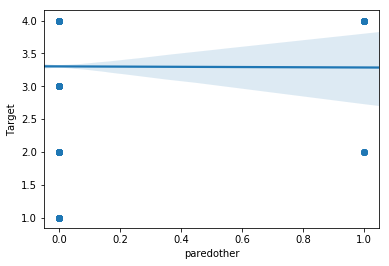

In [18]:
for f in wall_material:
    sns.regplot(x = train_data[f], y = train_data['Target'])
    plt.show()

In [19]:
def wall_price(data):
    if data['paredblolad'] == 1:
        return 12
    elif data['paredpreb'] == 1:
        return 10
    elif data['paredzocalo'] == 1:
        return 9
    elif data['paredother'] == 1:
        return 8
    elif data['paredmad'] == 1:
        return 6
    elif data['paredzinc'] == 1:
        return 4
    elif data['pareddes'] == 1:
        return 2
    elif data['paredfibras'] == 1:
        return 1
    else:
        print('Exceptions')
# We are going to use the conditions of wall to further estimate the current value of house
def wall_condition(data):
    if data['epared1'] == 1:
        return 1
    elif data['epared2'] == 1:
        return 2
    elif data['epared3'] == 1:
        return 3
    else:
        print('Exceptions!')
# Generate a feature called wall
def wall (data):
    a = data['wall_materials'] * data['wall_conditions']
    return a

In [20]:
data['wall_conditions'] = data.apply(lambda row: wall_condition(row),axis=1)
data['wall_materials'] = data.apply(lambda row: wall_price(row),axis = 1)
data['wall'] = data.apply(lambda row: wall(row),axis = 1)

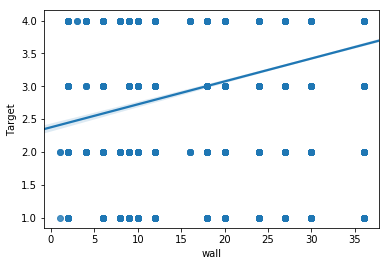

In [21]:
sns.regplot(x = data['wall'], y = train_data['Target'])
plt.show()

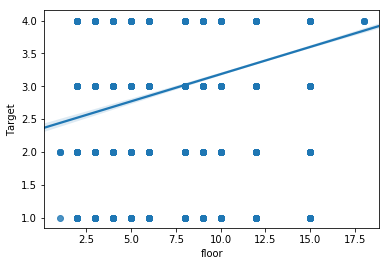

In [22]:
floor_material = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
def floor_price(data):
    if data['pisoother'] == 1:
        return 6
    elif data['pisomoscer'] == 1:
        return 5
    elif data['pisocemento'] == 1:
        return 4
    elif data['pisomadera'] == 1:
        return 3
    elif data['pisonotiene'] == 1:
        return 2
    elif data['pisonatur'] == 1:
        return 1
    else:
        print('Exceptions!')
data['floor_materials'] = data.apply(lambda row: floor_price(row),axis = 1)
def floor_condition(data):
    if data['etecho1'] == 1:
        return 1
    elif data['etecho2'] == 1:
        return 2
    elif data['etecho3'] == 1:
        return 3
    else:
        print('Exceptions!')
data['floor_conditions'] = data.apply(lambda row: floor_condition(row),axis=1)
def floor (data):
    a = data['floor_materials'] * data['floor_conditions']
    return a
data['floor'] = data.apply(lambda row: floor(row),axis = 1)
# Draw the correlation plot for housing floor materials
sns.regplot(x = data['floor'], y = train_data['Target'])
plt.show()

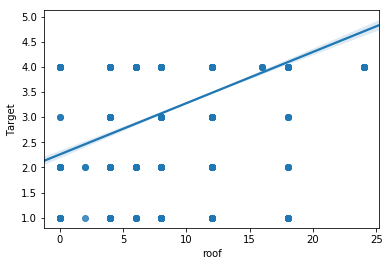

In [23]:
roof_material = ['techozinc','techoentrepiso','techocane','techootro']
def roof_price(data):
    if data['techootro'] == 1:
        return 8
    elif data['techoentrepiso'] == 1:
        return 6
    elif data['techozinc'] == 1:
        return 4
    elif data['techocane'] == 1:
        return 2
    else:
        return 0
train_data['roof_materials'] = train_data.apply(lambda row: roof_price(row),axis = 1)
def roof_condition(data):
    if data['eviv1'] == 1:
        return 1
    elif data['eviv2'] == 1:
        return 2
    elif data['eviv3'] == 1:
        return 3
    else:
        print('Exceptions!')
train_data['roof_conditions'] = train_data.apply(lambda row: roof_condition(row),axis=1)
def roof (data):
    a = data['roof_materials'] * data['roof_conditions']
    return a
train_data['roof'] = train_data.apply(lambda row: roof(row),axis = 1)
sns.regplot(x = data['roof'], y = train_data['Target'])
plt.show()

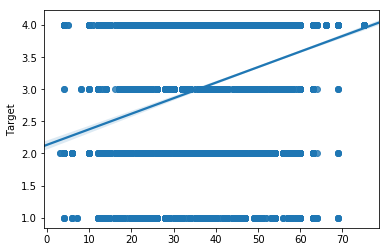

In [24]:
sns.regplot(x = train_data['floor'] + train_data['wall'] + train_data['roof'], y = train_data['Target'])
plt.show()

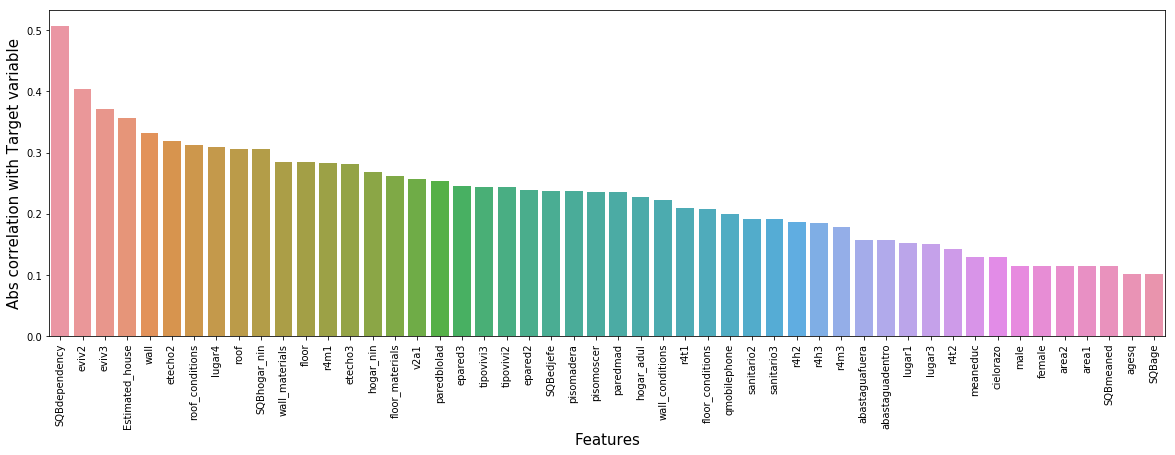

In [25]:
train_data['Estimated_house'] = (train_data['floor'] + train_data['wall'] + train_data['roof'])
corrmat = train_data.dropna().corr().abs()['Target'].sort_values(ascending=False).drop('Target')
f, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation='90')
sns.barplot(x=corrmat.head(50).index, y=corrmat.head(50))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Abs correlation with Target variable', fontsize=15)
plt.show()